## HW2: HW2 Handwritten digits classification

In this assignment, you will practice using artificial neural networks to perform handwritten digits classification. Specifically, you will

    - Create a NN (50 points)
        - the numbers of hidden layers
        - the number of hidden nodes 
        - activation functions
        
    - Train the network with the early stopping strategy (30 points)
        - set the validation set (20%)
        - monitor the val_accuracy to stop training early
        
    - Report the training and test accuracy (20 points)
    
The baseline accuracy on the test set is 96.0%; and your test acc should be higher than this number. Student will earn 20 extra points if her/his test accuracy is higher than 99.0%.

In [ ]:
import math
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt #using pyplot to display images

#### Load the MNIST Datasets
MNIST handwritten digits. 60k 28*28 grayscale images of the 10 digits, along with a test set of 10k images

![Fig. 1](handwrittendigits.png)

| *Fig.1. Handwritten digits examples.* |

    1. Keras.datasets.mnist.load_data
    2. Show images using the imshow() function in pyplot
        - https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.imshow.html
    3. One-hot-vector encoding using keras.utils.to_categorical() function

11501568/11490434 [==============================] - 0s 0us/step
Training set: (60000, 28, 28) and Training Targets: (60000,)
Test set: (10000, 28, 28) and test targets: (10000,)


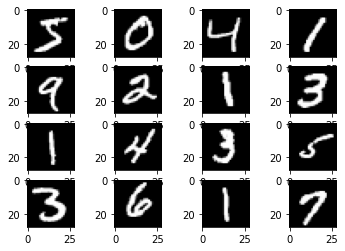

In [ ]:
# load and show data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print('Training set: {} and Training Targets: {}'.format(X_train.shape, y_train.shape))
print('Test set: {} and test targets: {}'.format(X_test.shape, y_test.shape))

# show first 16 images
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap = 'Greys_r')
plt.show()

In [ ]:
#2. reshape image data(28*28) to vectors (784*1)
X_train_1 = np.reshape(X_train, [X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test_1 = np.reshape(X_test, [X_test.shape[0], X_test.shape[1] * X_test.shape[2]])
print('training data:', X_train_1.shape, 'test data:', X_test_1.shape)

y_train_onehot = keras.utils.to_categorical(y_train)

training data: (60000, 784) test data: (10000, 784)


#### Create a neural network (50 points)

- the numbers of hidden layers
- the number of hidden nodes for each hiddern layer
- activation functions
- set the optimizer
- set the loss function and metrics

In [ ]:
# Create a neural network.
from keras.layers import Dropout
# add your code here
from sklearn.model_selection import train_test_split

rs = 0
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_train_1, y_train_onehot, 
                                                            test_size = 0.1, random_state = rs)

m = x_train_2.shape[1]
norm = keras.constraints.MaxNorm(max_value=2, axis=0)
model = keras.models.Sequential()
initializer = keras.initializers.GlorotNormal()
model.add(keras.layers.Dense(
    units=1000,
    input_dim=784,
    kernel_initializer=initializer,
    bias_initializer='zero',
    activation='relu',
    kernel_constraint=norm
   ))
model.add(keras.layers.Dense(
    units=1000,
    input_dim=784,
    kernel_initializer='lecun_normal',
    bias_initializer='lecun_normal',
    activation='relu',
    kernel_constraint=norm
   ))

model.add(keras.layers.Dense(
    units=750,
    input_dim=784,
    kernel_initializer='lecun_normal',
    bias_initializer='lecun_normal',
    activation='sigmoid',
    kernel_constraint=norm))

model.add(Dropout(0.25))
keras.layers.BatchNormalization()
model.add(keras.layers.Dense(
    units=500,
    input_dim=784,
    kernel_initializer='lecun_normal',
    bias_initializer='lecun_normal',
    activation='sigmoid',
    kernel_constraint=norm))
model.add(keras.layers.Dense(
    units=250,
    input_dim=784,
    kernel_initializer='lecun_normal',
    bias_initializer='lecun_normal',
    activation='sigmoid',
    kernel_constraint=norm))
keras.layers.BatchNormalization()
model.add(Dropout(0.15))
model.add(keras.layers.Dense(
    units=y_train_onehot.shape[1],
    input_dim=784,
    kernel_initializer='lecun_normal',
    bias_initializer='lecun_normal',
    activation='softmax',
    kernel_constraint=norm))
Adamax_opt = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=Adamax_opt, loss='categorical_crossentropy', metrics = ['accuracy'])

#
#model.summary()

#### Train the network with the early stopping strategy (30 points)
- set the validation set (20%)
- monitor the val_accuracy to stop training early
- set the batches and epochs

In [ ]:
# Train the model using the early stoping strategy
# add your code here
def scheduler(epoch, lr):
 if epoch < 10:
    return lr
 else:
    return lr * math.exp(-0.1)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)
lrs= keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
history = model.fit(X_train_1, y_train_onehot,
                    batch_size=32, epochs=20,
                    verbose=1,
                    validation_split=0.1,
                   callbacks = [early_stopping,lrs])




Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
1688/1688 [==============================] - 11s 4ms/step - loss: 0.4265 - accuracy: 0.8764 - val_loss: 0.1196 - val_accuracy: 0.9645 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1302 - accuracy: 0.9629 - val_loss: 0.0909 - val_accuracy: 0.9743 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0912 - accuracy: 0.9744 - val_loss: 0.0744 - val_accuracy: 0.9783 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0658 - accuracy: 0.9814 - val_loss: 0.0788 - val_accuracy: 0.9787 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning ra

#### Report the training and test accuracy (20 points)

In [ ]:
# Evaluation
y_train_pred = np.argmax(model.predict(X_train_1), axis=-1)
train_acc = sum(y_train == y_train_pred)/y_train.shape[0]

y_test_pred = np.argmax(model.predict(X_test_1), axis=-1)
test_acc = sum(y_test == y_test_pred)/y_test.shape[0]

print('training acc is', train_acc)
print('test acc is', test_acc)

#print('training acc is', train_acc)
#print('test acc is', test_acc)

training acc is 0.9983666666666666
test acc is 0.984
